In [244]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [245]:
df1 = pd.read_csv("MagicBricks.csv")
df1.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [246]:
df1.shape

(1259, 11)

In [247]:
df1.groupby("Type")["Type"].agg("count")

Type
Apartment        593
Builder_Floor    661
Name: Type, dtype: int64

In [248]:
df2 = df1.drop(["Type","Area","Bathroom"],axis="columns")
df2.head()

,BHK,Furnishing,Locality,Parking,Price,Status,Transaction,Per_Sqft
0,3,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,NaN
1,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,6667.0
2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,6667.0
3,2,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,6667.0
4,2,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,6667.0


In [249]:
df2.isnull().sum()

BHK              0
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Per_Sqft       241
dtype: int64

In [250]:
df3 = df2.dropna()
df3.isnull().sum()

BHK            0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Per_Sqft       0
dtype: int64

In [251]:
df3.shape

(1005, 8)

In [252]:
df3["BHK"].unique()

array([2, 4, 3, 1, 6, 5, 7], dtype=int64)

In [253]:
df3[df3.BHK>6]

,BHK,Furnishing,Locality,Parking,Price,Status,Transaction,Per_Sqft
345,7,Furnished,"Yamuna Vihar, Shahdara",1.0,26500000,Ready_to_move,Resale,8923.0


In [254]:
df3.Price.unique()

array([  5000000,  15500000,   4200000,   6200000,  10000000,   4000000,
         6800000,  15000000,   7700000,   5500000,   3310000,   4700000,
         4500000,  17000000,  25000000,   6000000,  11000000,   5300000,
        10500000,  12000000,   7000000,   3400000,  21000000,  13000000,
        22000000,  15800000,  57500000,  30000000,  24000000,  31500000,
        14600000, 240000000,   8300000,  22500000,   1900000,   5130000,
         5890000,   3700000,  17400000,   2400000,  17200000,  14200000,
        13500000,  20500000,  16500000,  14900000,  19200000,  14500000,
        15600000,  11400000,  16000000,  14800000,   1850000,  40000000,
        46000000,  55000000,  24500000,  32500000,  20000000,  19000000,
        26000000,  27500000,  45000000,  28000000,  29500000,  12500000,
        11500000,  25500000,  31000000,  13400000,  35000000,   6300000,
        10300000,  28500000,   3600000,   4300000,   1650000,   2000000,
         3000000,   1400000,   2600000,   5100000, 

In [255]:
df3.head(3)

,BHK,Furnishing,Locality,Parking,Price,Status,Transaction,Per_Sqft
1,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,6667.0
2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,6667.0
3,2,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,6667.0


In [256]:
df4 = df3.copy()
df4["Price_Per_Sqft"] = df4["Price"]*10/df4["Per_Sqft"]
df4.head()

,BHK,Furnishing,Locality,Parking,Price,Status,Transaction,Per_Sqft,Price_Per_Sqft
1,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,6667.0,7499.625019
2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,6667.0,23248.837558
3,2,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,6667.0,6299.685016
4,2,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,6667.0,9299.535023
5,4,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,6667.0,23248.837558


In [257]:
len(df4.Locality.unique())

304

In [258]:
df4.Loclity = df4.Locality.apply(lambda x: x.strip())
location_stats = df4.groupby("Locality")["Locality"].agg("count").sort_values(ascending=False)
location_stats

<ipython-input-258-6089c82a7a5e>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df4.Loclity = df4.Locality.apply(lambda x: x.strip())


Locality
J R Designers Floors, Rohini Sector 24                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         31
Kailash Colony, Greater Kailash                                                                                                                                              

In [259]:
len(location_stats[location_stats<=20])

296

In [260]:
location_stats_less_than_20 = location_stats[location_stats<=20]
location_stats_less_than_20

Locality
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 20
Safdarjung Enclave                                                                                                                                                           

In [261]:
len(df4.Locality.unique())

304

In [262]:
df4.Locality = df4.Locality.apply(lambda x: "other" if x in location_stats_less_than_20 else x)
len(df4.Locality.unique())

9

In [263]:
df4.head(20)

,BHK,Furnishing,Locality,Parking,Price,Status,Transaction,Per_Sqft,Price_Per_Sqft
1,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,6667.0,7499.625019
2,2,Furnished,other,1.0,15500000,Ready_to_move,Resale,6667.0,23248.837558
3,2,Semi-Furnished,other,1.0,4200000,Ready_to_move,Resale,6667.0,6299.685016
4,2,Semi-Furnished,other,1.0,6200000,Ready_to_move,New_Property,6667.0,9299.535023
5,4,Semi-Furnished,other,1.0,15500000,Ready_to_move,New_Property,6667.0,23248.837558
6,4,Semi-Furnished,other,1.0,10000000,Ready_to_move,Resale,6667.0,14999.250037
7,2,Semi-Furnished,other,1.0,4000000,Ready_to_move,New_Property,6154.0,6499.837504
8,3,Unfurnished,other,1.0,6800000,Almost_ready,New_Property,6154.0,11049.723757
9,4,Semi-Furnished,other,1.0,15000000,Ready_to_move,New_Property,6154.0,24374.390640
10,3,Semi-Furnished,other,1.0,6200000,Ready_to_move,New_Property,6154.0,10074.748131


In [264]:
df4[df4.Per_Sqft/df4.BHK<300].head()

,BHK,Furnishing,Locality,Parking,Price,Status,Transaction,Per_Sqft,Price_Per_Sqft
163,6,Furnished,other,1.0,5100000,Ready_to_move,Resale,1259.0,40508.339952


In [265]:
df4.shape

(1005, 9)

In [266]:
df5 = df4[~(df4.Per_Sqft/df4.BHK<300)]
df5.shape

(1004, 9)

In [267]:
df5.Price_Per_Sqft.describe()

count      1004.000000
mean      17367.373885
std       21353.553117
min         349.997083
25%        6320.569951
50%       12000.192003
75%       21250.424463
max      313199.105145
Name: Price_Per_Sqft, dtype: float64

In [268]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("Locality"):
        m = np.mean(subdf.Price_Per_Sqft)
        st = np.std(subdf.Price_Per_Sqft)
        reduced_df = subdf[(subdf.Price_Per_Sqft>(m-st)) & (subdf.Price_Per_Sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out    

df6 = remove_pps_outliers(df5)
df6.shape

(883, 9)

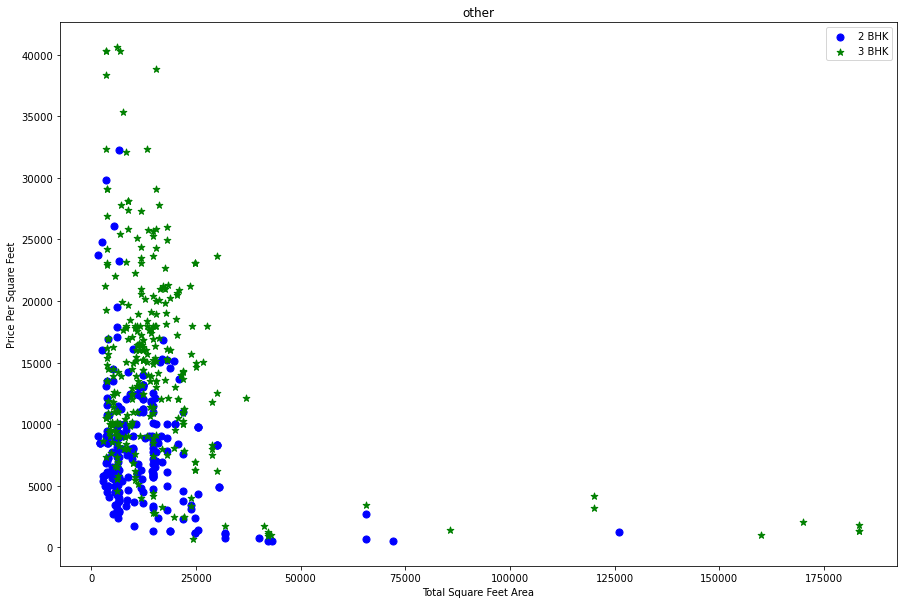

In [269]:
def plot_scatter_chart(df,Locality):
    BHK2 = df[(df.Locality==Locality) & (df.BHK==2)]
    BHK3 = df[(df.Locality==Locality) & (df.BHK==3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(BHK2.Per_Sqft,BHK2.Price_Per_Sqft,color="blue",label="2 BHK", s=50)
    plt.scatter(BHK3.Per_Sqft,BHK3.Price_Per_Sqft,marker="*",color="green",label="3 BHK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(Locality)
    plt.legend()
    
plot_scatter_chart(df6,"other")

In [270]:
def remove_BHK_outliers(df):
    exclude_indices = np.array([])
    for Locality, Locality_df in df.groupby("Locality"):
        BHK_stats = {}
        for BHK,BHK_df in Locality_df.groupby("BHK"):
            BHK_stats[BHK] = {
                "mean": np.mean(BHK_df.Price_Per_Sqft),
                "std": np.std(BHK_df.Price_Per_Sqft),
                "count": BHK_df.shape[0]
            }
        for BHK, BHK_df in Locality_df.groupby("BHK"):
            stats = BHK_stats.get(BHK-1)
            if stats and stats["count"]>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.Price_Per_Sqft<(stats["mean"])].index.values)
                
                
    return df.drop(exclude_indices,axis = "index") 

df7 = remove_BHK_outliers(df6)
df7.shape

(748, 9)

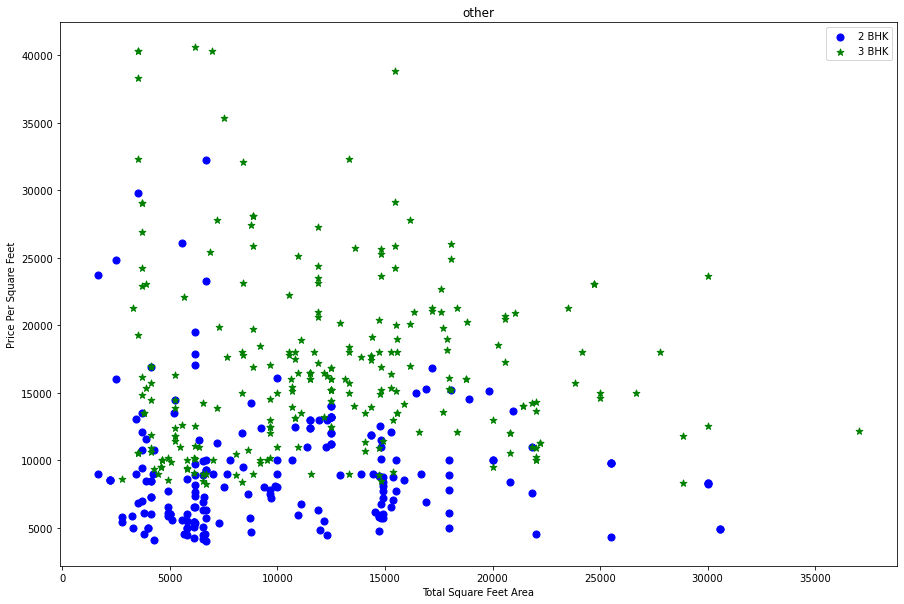

In [271]:
plot_scatter_chart(df7,"other")

Text(0, 0.5, 'Count')

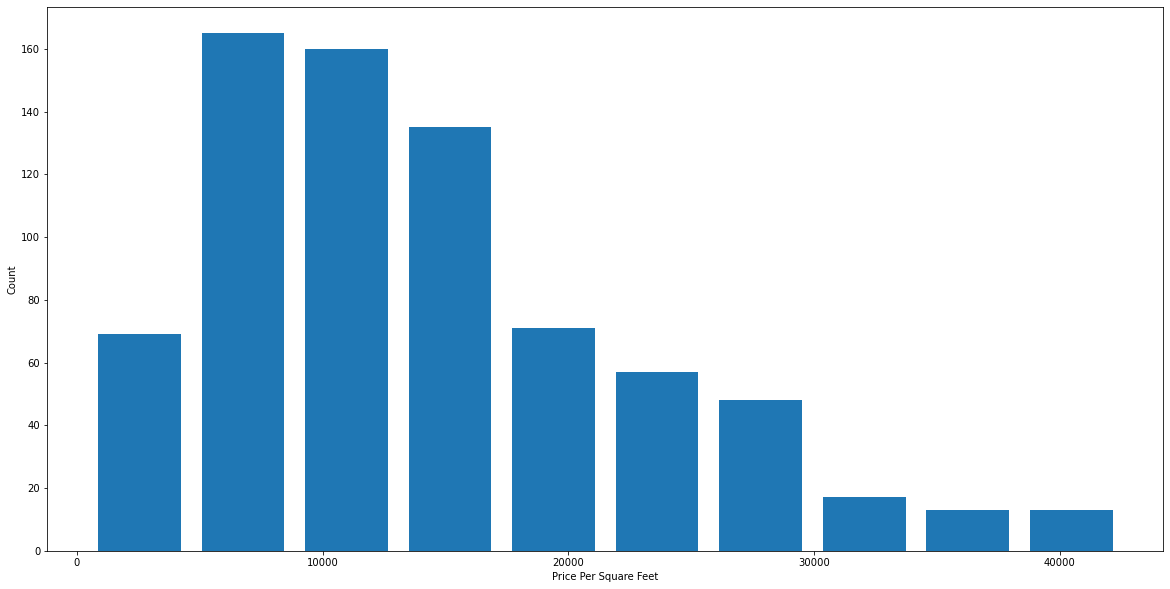

In [272]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.Price_Per_Sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [273]:
df7.BHK.unique()

array([3, 4, 2, 1, 5, 6], dtype=int64)

In [274]:
df7[df7.BHK>3]

,BHK,Furnishing,Locality,Parking,Price,Status,Transaction,Per_Sqft,Price_Per_Sqft
1,4,Semi-Furnished,Chittaranjan Park,3.0,62500000,Ready_to_move,New_Property,20938.0,29850.033432
15,4,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,12916.0,42582.842985
25,4,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,13000000,Ready_to_move,New_Property,8125.0,16000.000000
46,4,Semi-Furnished,"Kailash Colony, Greater Kailash",2.0,47500000,Ready_to_move,New_Property,20000.0,23750.000000
47,4,Semi-Furnished,"Kailash Colony, Greater Kailash",1.0,40000000,Ready_to_move,New_Property,20000.0,20000.000000
...,...,...,...,...,...,...,...,...,...
870,4,Semi-Furnished,other,3.0,70000000,Ready_to_move,New_Property,25000.0,28000.000000
872,4,Unfurnished,other,1.0,65000000,Ready_to_move,Resale,25000.0,26000.000000
874,4,Semi-Furnished,other,1.0,56000000,Ready_to_move,New_Property,17677.0,31679.583640
876,4,Semi-Furnished,other,2.0,100000000,Ready_to_move,New_Property,37037.0,27000.027000


Text(0, 0.5, 'Count')

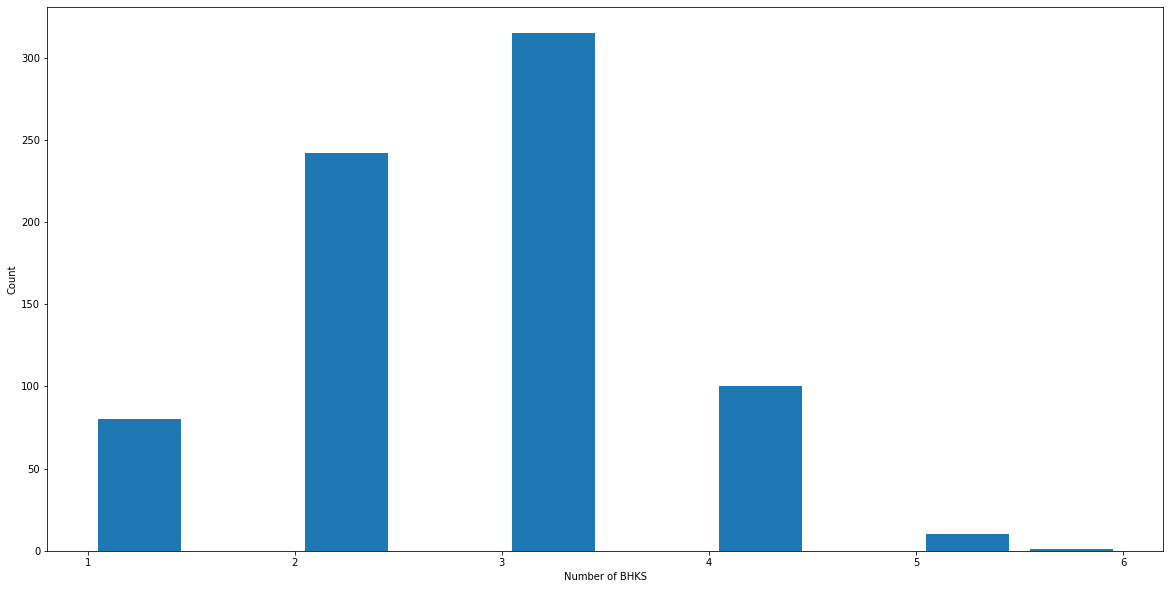

In [275]:
plt.hist(df7.BHK,rwidth=0.8)
plt.xlabel("Number of BHKS")
plt.ylabel("Count")

In [276]:
df7.head(10)

,BHK,Furnishing,Locality,Parking,Price,Status,Transaction,Per_Sqft,Price_Per_Sqft
0,3,Semi-Furnished,Chittaranjan Park,2.0,33500000,Ready_to_move,New_Property,20938.0,15999.617920
1,4,Semi-Furnished,Chittaranjan Park,3.0,62500000,Ready_to_move,New_Property,20938.0,29850.033432
2,3,Semi-Furnished,Chittaranjan Park,2.0,47500000,Ready_to_move,New_Property,20938.0,22686.025408
3,3,Semi-Furnished,Chittaranjan Park,1.0,14700000,Ready_to_move,Resale,20938.0,7020.727863
4,2,Semi-Furnished,Chittaranjan Park,1.0,18000000,Ready_to_move,New_Property,20938.0,8596.809628
5,3,Semi-Furnished,Chittaranjan Park,1.0,22500000,Ready_to_move,New_Property,20938.0,10746.012036
6,3,Unfurnished,Chittaranjan Park,1.0,22000000,Ready_to_move,New_Property,18333.0,12000.218186
7,3,Semi-Furnished,Chittaranjan Park,1.0,22500000,Ready_to_move,Resale,18333.0,12272.950417
8,2,Unfurnished,Chittaranjan Park,5.0,6500000,Ready_to_move,Resale,6878.0,9450.421634
9,3,Semi-Furnished,Chittaranjan Park,2.0,11500000,Ready_to_move,New_Property,6878.0,16719.976737


In [277]:
df8 = df7.drop(["Furnishing","Status","Transaction"],axis="columns")
df8.head(5)

,BHK,Locality,Parking,Price,Per_Sqft,Price_Per_Sqft
0,3,Chittaranjan Park,2.0,33500000,20938.0,15999.617920
1,4,Chittaranjan Park,3.0,62500000,20938.0,29850.033432
2,3,Chittaranjan Park,2.0,47500000,20938.0,22686.025408
3,3,Chittaranjan Park,1.0,14700000,20938.0,7020.727863
4,2,Chittaranjan Park,1.0,18000000,20938.0,8596.809628


In [278]:
dummies = pd.get_dummies(df8.Locality)
dummies.head(3)

,Chittaranjan Park,"J R Designers Floors, Rohini Sector 24","Kailash Colony, Greater Kailash",Lajpat Nagar 2,Laxmi Nagar,Mehrauli,Saket,"Yamuna Vihar, Shahdara",other
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0


In [279]:
df9 = pd.concat([df8,dummies.drop("other",axis="columns")],axis="columns")
df9.head(3)

,BHK,Locality,Parking,Price,Per_Sqft,Price_Per_Sqft,Chittaranjan Park,"J R Designers Floors, Rohini Sector 24","Kailash Colony, Greater Kailash",Lajpat Nagar 2,Laxmi Nagar,Mehrauli,Saket,"Yamuna Vihar, Shahdara"
0,3,Chittaranjan Park,2.0,33500000,20938.0,15999.617920,1,0,0,0,0,0,0,0
1,4,Chittaranjan Park,3.0,62500000,20938.0,29850.033432,1,0,0,0,0,0,0,0
2,3,Chittaranjan Park,2.0,47500000,20938.0,22686.025408,1,0,0,0,0,0,0,0


In [280]:
df10 = df9.drop("Locality",axis="columns")
df10.head(2)

,BHK,Parking,Price,Per_Sqft,Price_Per_Sqft,Chittaranjan Park,"J R Designers Floors, Rohini Sector 24","Kailash Colony, Greater Kailash",Lajpat Nagar 2,Laxmi Nagar,Mehrauli,Saket,"Yamuna Vihar, Shahdara"
0,3,2.0,33500000,20938.0,15999.617920,1,0,0,0,0,0,0,0
1,4,3.0,62500000,20938.0,29850.033432,1,0,0,0,0,0,0,0


In [281]:
df10.shape

(748, 13)

In [282]:
X = df10.drop("Price",axis="columns")
X.head()

,BHK,Parking,Per_Sqft,Price_Per_Sqft,Chittaranjan Park,"J R Designers Floors, Rohini Sector 24","Kailash Colony, Greater Kailash",Lajpat Nagar 2,Laxmi Nagar,Mehrauli,Saket,"Yamuna Vihar, Shahdara"
0,3,2.0,20938.0,15999.617920,1,0,0,0,0,0,0,0
1,4,3.0,20938.0,29850.033432,1,0,0,0,0,0,0,0
2,3,2.0,20938.0,22686.025408,1,0,0,0,0,0,0,0
3,3,1.0,20938.0,7020.727863,1,0,0,0,0,0,0,0
4,2,1.0,20938.0,8596.809628,1,0,0,0,0,0,0,0


In [283]:
y = df10.Price
y.head()

0    33500000
1    62500000
2    47500000
3    14700000
4    18000000
Name: Price, dtype: int64

In [284]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [285]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.3368374784584074

In [286]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.27813624, 0.30133661, 0.84318643, 0.8511298 , 0.85198669])

In [294]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        "linear_regression" :{
            "model" : LinearRegression(),
            "params" : {
                "normalize" : [True, False]
                
            }
        },
        "lasso": {
            'model': Lasso(),
            "params": {
                "alpha": [1,2],
                "selection": ["random", "cyclic"]
            }
        },   
        "decision_tree" : {
            "model" : DecisionTreeRegressor(),
            "params" : {
                "criterion" : ["mse","friedman_mse"],
                "splitter" : ["best","random"]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            "model" : algo_name,
            "best_score" : gs.best_score_,
            "best_params" : gs.best_params_
        })
     
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])

find_best_model_using_gridsearchcv(x,y)
        

,model,best_score,best_params
0,linear_regression,0.625155,{'normalize': False}
1,lasso,0.625155,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.975281,"{'criterion': 'mse', 'splitter': 'best'}"


In [295]:
x.columns

Index(['BHK', 'Parking', 'Per_Sqft', 'Price_Per_Sqft', 'Chittaranjan Park',
       'J R Designers Floors, Rohini Sector 24',
       'Kailash Colony, Greater Kailash', 'Lajpat Nagar 2', 'Laxmi Nagar',
       'Mehrauli', 'Saket', 'Yamuna Vihar, Shahdara'],
      dtype='object')

In [296]:
np.where(x.columns=="Chittaranjan Park")[0][0]

4